In [1]:
data = open("/data/songs_v2.txt").read()

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

corpus = data.lower().split('\n')
print(len(corpus))
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1
#print(tokenizer.word_index.items())

2032


In [3]:
input_seq = []

for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]

    for i in range(1, len(token_list)):
        pieces = token_list[:i+1]
        input_seq.append(pieces)

#print(input_seq)

In [4]:
import numpy as np

max_seq_len = max([len(i) for i in input_seq])

input_seq = np.array(pad_sequences(input_seq, maxlen=max_seq_len, padding="pre"))

xs = input_seq[:,:-1]
labels = input_seq[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)  # another way np.eye(total_words)[labels]
#print(x_train[0:9])
print(ys[0])


[0. 0. 0. ... 0. 0. 0.]


In [5]:
from tensorflow.keras import Sequential, layers, optimizers, losses


model = Sequential([
              layers.Embedding(total_words, output_dim=108, input_length=max_seq_len-1),
              layers.Bidirectional(layers.LSTM(216)),
              layers.Dense(216, activation='relu'),
              layers.Dropout(.25),
              layers.Dense(total_words)

])
model.summary()

model.compile(optimizer=optimizers.Adam(lr=1e-3), 
              loss=losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(xs, ys, batch_size=64, verbose=2, epochs=100)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 15, 108)           324000    
_________________________________________________________________
bidirectional (Bidirectional (None, 432)               561600    
_________________________________________________________________
dense (Dense)                (None, 216)               93528     
_________________________________________________________________
dropout (Dropout)            (None, 216)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 3000)              651000    
Total params: 1,630,128
Trainable params: 1,630,128
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
226/226 - 2s - loss: 6.7545 - accuracy: 0.0635
Epoch 2/100
226/226 - 2s - loss: 6.3119 - accuracy: 0

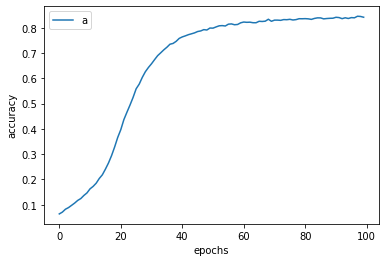

In [6]:
import matplotlib.pyplot as plt

plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.plot(history.history["accuracy"])
plt.legend("accuracy")
plt.show()

In [9]:
seed_text = "yet another awesome day coming along with the charming morning"
next_words = 50

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_seq_len-1, padding="pre")
    predicted =  np.argmax(model.predict(token_list), axis=1)
    output_word = ""
    for word, index in tokenizer.word_index.items():
    if predicted == index:
        output_word = word
        break
    seed_text += " " + output_word

print(seed_text)

yet another awesome day coming along with the charming morning by law ten feet are calling me hand and a lark brand journey to roving boatsman under equality howl beautiful smile were me more and aisy as a frame mary went and sweet diggin for gold in the street is they sounds the larks shure stream be back on shining
